<a href="https://colab.research.google.com/github/KIMssy/Basic-statistics-programming/blob/main/moving_average_local_people02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/LOCAL_PEOPLE_GU_2021.csv',sep=',',encoding='euc-kr')

In [9]:
print(data)

           기준일ID  시간대구분  자치구코드  totalpeople
0       20210101      0  11110  194924.6184
1       20210101      0  11140  148826.8808
2       20210101      0  11170  250141.2136
3       20210101      0  11200  315490.0745
4       20210101      0  11215  360268.0149
...          ...    ...    ...          ...
218995  20211231     23  11620  472514.0761
218996  20211231     23  11650  455062.9561
218997  20211231     23  11680  626466.4158
218998  20211231     23  11710  712411.1104
218999  20211231     23  11740  524319.2164

[219000 rows x 4 columns]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219000 entries, 0 to 218999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   기준일ID        219000 non-null  int64  
 1   시간대구분        219000 non-null  int64  
 2   자치구코드        219000 non-null  int64  
 3   totalpeople  219000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 6.7 MB


In [12]:
def get_localpeople(i):
    z = data['totalpeople'][i]  
    return z

In [13]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1): #인덱스는 0에서부터 시작하기 때문에 n-1을 해야함
      x_n[i] = x_n[i+1]
      x_n[n-1] = x_meas
      x_avg = np.mean(x_n)

    return x_avg, x_n

    #이동평균필터

In [14]:
len(data)

219000

In [20]:
#input paramoters

n_samples = 219 #n_sample은 그대로, 데이터 갯수여서

n=10
time_end = 10

In [21]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [22]:
print(time)
print(x_meas_save)
print(x_avg_save)

[0.         0.0456621  0.0913242  0.1369863  0.1826484  0.2283105
 0.2739726  0.3196347  0.3652968  0.4109589  0.456621   0.50228311
 0.54794521 0.59360731 0.63926941 0.68493151 0.73059361 0.77625571
 0.82191781 0.86757991 0.91324201 0.95890411 1.00456621 1.05022831
 1.09589041 1.14155251 1.18721461 1.23287671 1.27853881 1.32420091
 1.36986301 1.41552511 1.46118721 1.50684932 1.55251142 1.59817352
 1.64383562 1.68949772 1.73515982 1.78082192 1.82648402 1.87214612
 1.91780822 1.96347032 2.00913242 2.05479452 2.10045662 2.14611872
 2.19178082 2.23744292 2.28310502 2.32876712 2.37442922 2.42009132
 2.46575342 2.51141553 2.55707763 2.60273973 2.64840183 2.69406393
 2.73972603 2.78538813 2.83105023 2.87671233 2.92237443 2.96803653
 3.01369863 3.05936073 3.10502283 3.15068493 3.19634703 3.24200913
 3.28767123 3.33333333 3.37899543 3.42465753 3.47031963 3.51598174
 3.56164384 3.60730594 3.65296804 3.69863014 3.74429224 3.78995434
 3.83561644 3.88127854 3.92694064 3.97260274 4.01826484 4.06392

In [23]:
for i in range(n_samples):
  x_meas = get_localpeople(i)
  if i == 0:
      x_avg, x_n = x_meas, x_meas * np.ones(n)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas * np.ones(n))
  else:
    x_avg, x_n = mov_avg_filter(x_n, x_meas)
    print(x_n)
  x_meas_save[i] = x_meas
  x_avg_save[i] = x_avg

[194924.6184 194924.6184 194924.6184 194924.6184 194924.6184 194924.6184
 194924.6184 194924.6184 194924.6184 194924.6184]
[194924.6184 194924.6184 194924.6184 194924.6184 194924.6184 194924.6184
 194924.6184 194924.6184 148826.8808 148826.8808]
[194924.6184 194924.6184 194924.6184 194924.6184 194924.6184 194924.6184
 194924.6184 148826.8808 250141.2136 250141.2136]
[194924.6184 194924.6184 194924.6184 194924.6184 194924.6184 194924.6184
 148826.8808 250141.2136 315490.0745 315490.0745]
[194924.6184 194924.6184 194924.6184 194924.6184 194924.6184 148826.8808
 250141.2136 315490.0745 360268.0149 360268.0149]
[194924.6184 194924.6184 194924.6184 194924.6184 148826.8808 250141.2136
 315490.0745 360268.0149 342059.9682 342059.9682]
[194924.6184 194924.6184 194924.6184 148826.8808 250141.2136 315490.0745
 360268.0149 342059.9682 386959.7457 386959.7457]
[194924.6184 194924.6184 148826.8808 250141.2136 315490.0745 360268.0149
 342059.9682 386959.7457 435615.8069 435615.8069]
[194924.6184 148

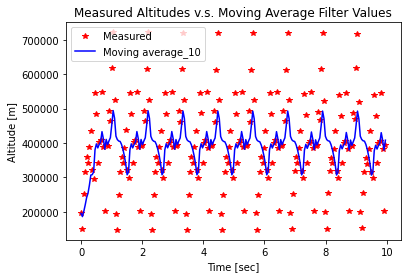

In [24]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average_10')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/png')